In [268]:
import numpy as np
import pandas as pd

In [269]:
data = pd.read_csv('Crop_recommendation.csv')

In [270]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [271]:
total_crops = data['label'].unique().shape
print("The total number of crops that we can give a recommendation to is : ", total_crops[0])

The total number of crops that we can give a recommendation to is :  22


In [272]:
# Find a multi-output regressor

In [273]:
X = data[['ph','humidity','rainfall']]
y = data['label']

In [274]:
import matplotlib.pyplot as plt

In [275]:
X

,ph,humidity,rainfall
0,6.502985,82.002744,202.935536
1,7.038096,80.319644,226.655537
2,7.840207,82.320763,263.964248
3,6.980401,80.158363,242.864034
4,7.628473,81.604873,262.717340
...,...,...,...
2195,6.780064,66.413269,177.774507
2196,6.086922,56.636362,127.924610
2197,6.362608,67.225123,173.322839
2198,6.758793,52.127394,127.175293


In [276]:
unique_crops = y.unique()
unique_crops

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [277]:
# Mapping the Crop to the -> value;

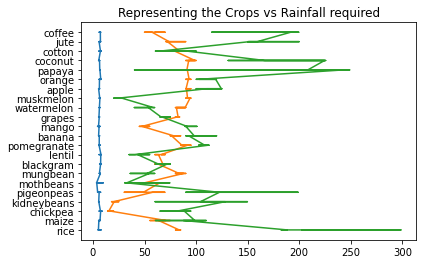

In [278]:
plt.plot(X,y)
plt.title("Representing the Crops vs Rainfall required")
plt.show()

In [279]:
X_label = data.iloc[:, :-1].values
y_label = data.iloc[: , -1].values

In [280]:
y_label = (y_label.reshape(y_label.shape[0],1))

In [281]:
#MultiOutput Regression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.2, random_state=0)

In [283]:
y_train

array([['apple'],
       ['jute'],
       ['jute'],
       ...,
       ['blackgram'],
       ['lentil'],
       ['orange']], dtype=object)

In [284]:
categories = []

for crop in y.unique():
    categories.append(crop)
    
    
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories = 'auto',sparse=False)

In [285]:
y_train = encoder.fit_transform(y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [286]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [287]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [288]:
# for crop in y_train : 
#     print(crop)


In [289]:
X_train

array([[ 27.        , 120.        , 200.        , ...,  90.74531921,
          6.11021883, 116.7036582 ],
       [ 81.        ,  36.        ,  38.        , ...,  87.98329901,
          6.33483786, 150.3166152 ],
       [ 90.        ,  59.        ,  35.        , ...,  89.86454053,
          7.09822793, 175.1742112 ],
       ...,
       [ 35.        ,  64.        ,  15.        , ...,  63.53604453,
          6.50014496,  69.5274407 ],
       [ 39.        ,  65.        ,  23.        , ...,  69.12613376,
          7.6859593 ,  41.02682925],
       [ 14.        ,  22.        ,   9.        , ...,  91.13772765,
          6.54319181, 112.5090516 ]])

In [290]:
base_estimator = RandomForestRegressor(n_estimators=100, random_state=42)
multioutput_regressor = MultiOutputRegressor(base_estimator)

In [291]:
multioutput_regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [292]:
y_test = encoder.fit_transform(y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [293]:
predictions = multioutput_regressor.predict(X_test)

In [294]:
print(predictions)

[[0.   0.   0.   ... 0.   0.   0.9 ]
 [0.   0.   0.   ... 0.   0.   1.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.01 ... 0.   0.   0.  ]
 [0.   0.   1.   ... 0.   0.   0.  ]
 [1.   0.   0.   ... 0.   0.   0.  ]]


In [295]:
predicted_crops = encoder.inverse_transform(predictions)


In [296]:
print(predicted_crops)

[['watermelon']
 ['watermelon']
 ['grapes']
 ['chickpea']
 ['blackgram']
 ['rice']
 ['mothbeans']
 ['kidneybeans']
 ['muskmelon']
 ['banana']
 ['mothbeans']
 ['coffee']
 ['lentil']
 ['mungbean']
 ['mango']
 ['apple']
 ['coffee']
 ['lentil']
 ['coffee']
 ['mango']
 ['coconut']
 ['blackgram']
 ['kidneybeans']
 ['jute']
 ['cotton']
 ['coffee']
 ['lentil']
 ['orange']
 ['mothbeans']
 ['kidneybeans']
 ['pomegranate']
 ['rice']
 ['maize']
 ['muskmelon']
 ['coconut']
 ['cotton']
 ['mango']
 ['mango']
 ['watermelon']
 ['mothbeans']
 ['maize']
 ['blackgram']
 ['pigeonpeas']
 ['watermelon']
 ['pigeonpeas']
 ['mungbean']
 ['kidneybeans']
 ['kidneybeans']
 ['cotton']
 ['mungbean']
 ['mothbeans']
 ['blackgram']
 ['apple']
 ['muskmelon']
 ['pigeonpeas']
 ['banana']
 ['papaya']
 ['mango']
 ['lentil']
 ['cotton']
 ['orange']
 ['mungbean']
 ['watermelon']
 ['rice']
 ['muskmelon']
 ['apple']
 ['grapes']
 ['coffee']
 ['apple']
 ['orange']
 ['coconut']
 ['pomegranate']
 ['kidneybeans']
 ['maize']
 ['grape

In [304]:
new_input = [[65,48,46,23,64,400,250]]



ans = multioutput_regressor.predict(new_input).flatten()

In [305]:
print(ans)

[0.   0.   0.01 0.   0.   0.17 0.   0.   0.31 0.   0.   0.   0.   0.68
 0.   0.   0.   0.04 0.3  0.   0.95 0.  ]


In [306]:
ans = encoder.inverse_transform(ans)

ValueError: Expected 2D array, got 1D array instead:
array=[0.   0.   0.01 0.   0.   0.17 0.   0.   0.31 0.   0.   0.   0.   0.68
 0.   0.   0.   0.04 0.3  0.   0.95 0.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
ans